In [1]:
!pip install torch helper -q

In [2]:
import torch

In [3]:
def linear_q_with_scale_and_zero_point(
    tensor,
    scale,
    zero_point,
    dtype=torch.int8
    ):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)
    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = torch.clamp(rounded_tensor, q_min, q_max).to(dtype)

    return q_tensor

    

In [4]:
test_tensor = torch.tensor(
[[191.6, -13.5, 728.6],
 [92.14, 295.5,  -184],
 [0,     684.6, 245.5]]
)

In [5]:
scale = 4.5
zero_point = -69

In [6]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale, zero_point
)

In [7]:
quantized_tensor

tensor([[ -26,  -72,   93],
        [ -49,   -3, -110],
        [ -69,   83,  -14]], dtype=torch.int8)

In [8]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [9]:
dequantized_tensor

tensor([[ 193.5000,  -13.5000,  729.0000],
        [  90.0000,  297.0000, -184.5000],
        [   0.0000,  684.0000,  247.5000]])

In [10]:
scale * (quantized_tensor - zero_point)

tensor([[ 193.5000,  -13.5000, -423.0000],
        [  90.0000,  297.0000, -184.5000],
        [   0.0000, -468.0000,  247.5000]])

In [11]:
def linear_dequantization(
        quantized_tensor,
        scale,
        zero_point
    ):
    return scale * (quantized_tensor.float() - zero_point)

In [12]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point
)

In [13]:
dequantized_tensor

tensor([[ 193.5000,  -13.5000,  729.0000],
        [  90.0000,  297.0000, -184.5000],
        [   0.0000,  684.0000,  247.5000]])

In [14]:
from helper import plot_quantization_errors

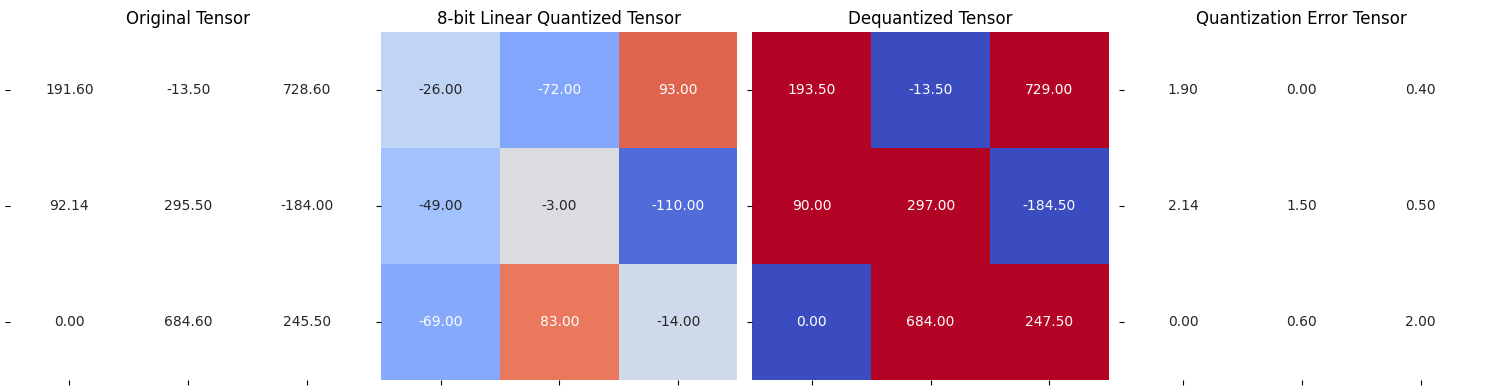

In [15]:
plot_quantization_errors(test_tensor, quantized_tensor,
                         dequantized_tensor)

In [16]:
dequantized_tensor - test_tensor

tensor([[ 1.9000,  0.0000,  0.4000],
        [-2.1400,  1.5000, -0.5000],
        [ 0.0000, -0.6000,  2.0000]])

In [17]:
(dequantized_tensor - test_tensor).square()

tensor([[3.6100, 0.0000, 0.1600],
        [4.5796, 2.2500, 0.2500],
        [0.0000, 0.3600, 4.0000]])

In [18]:
((dequantized_tensor - test_tensor).square()).mean()

tensor(1.6900)